* Crie um jupyter notebook com os imports necessários e um código para gerar os gráficos referentes a base de dados de março, abril, maio, junho e dezembro.

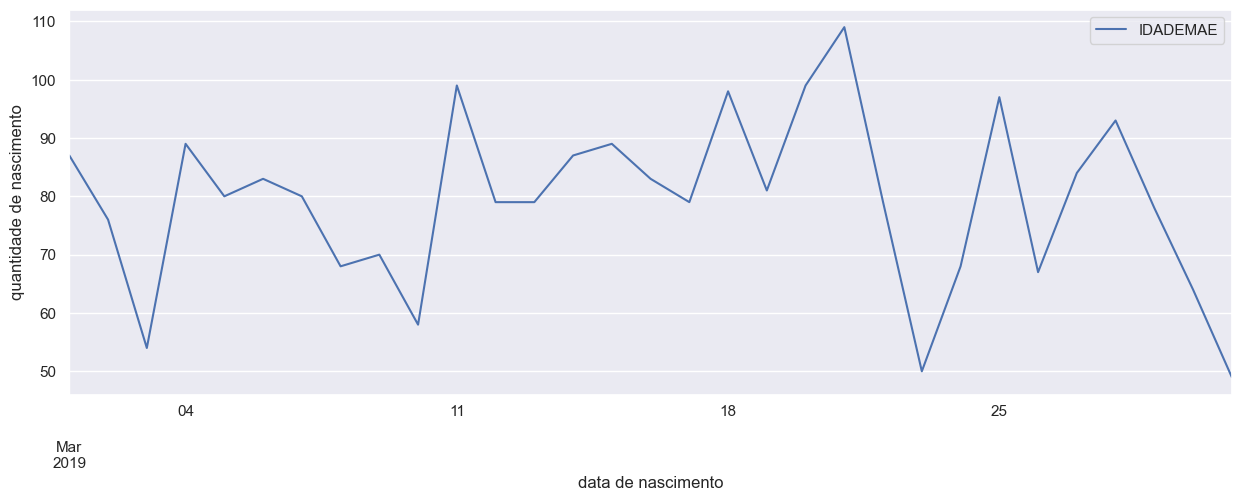

<Figure size 640x480 with 0 Axes>

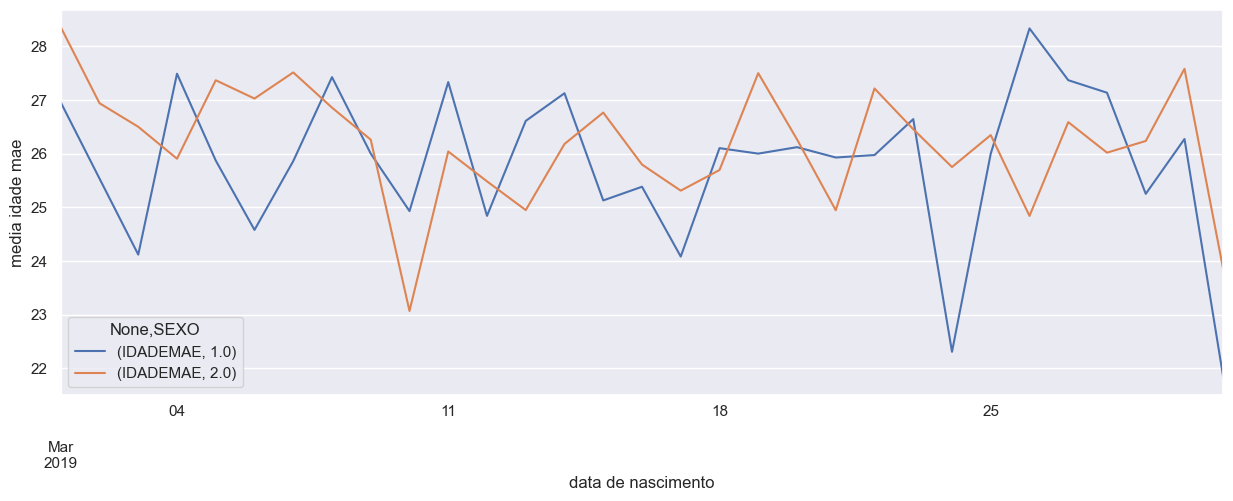

<Figure size 640x480 with 0 Axes>

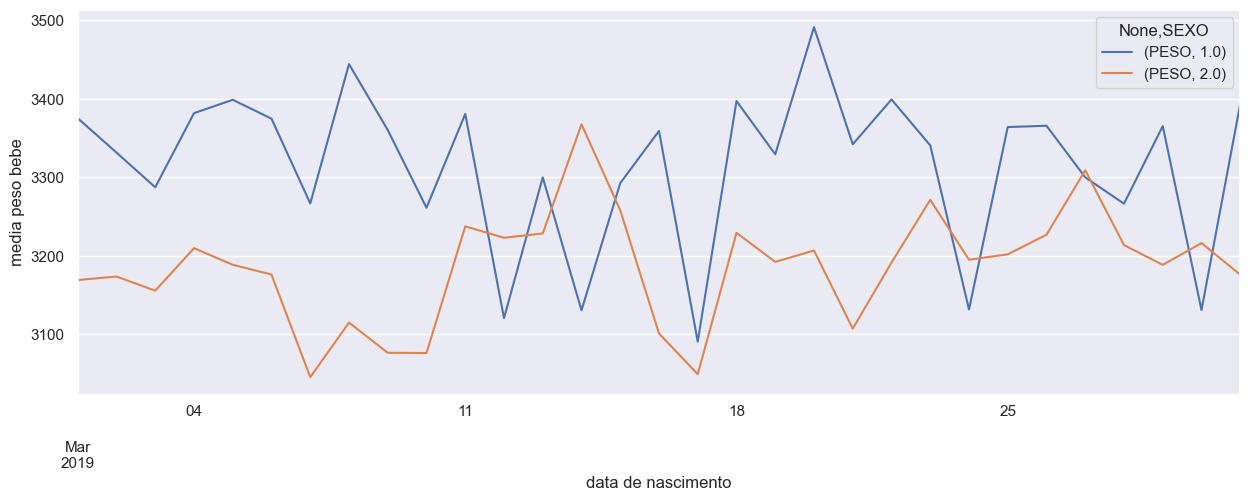

<Figure size 640x480 with 0 Axes>

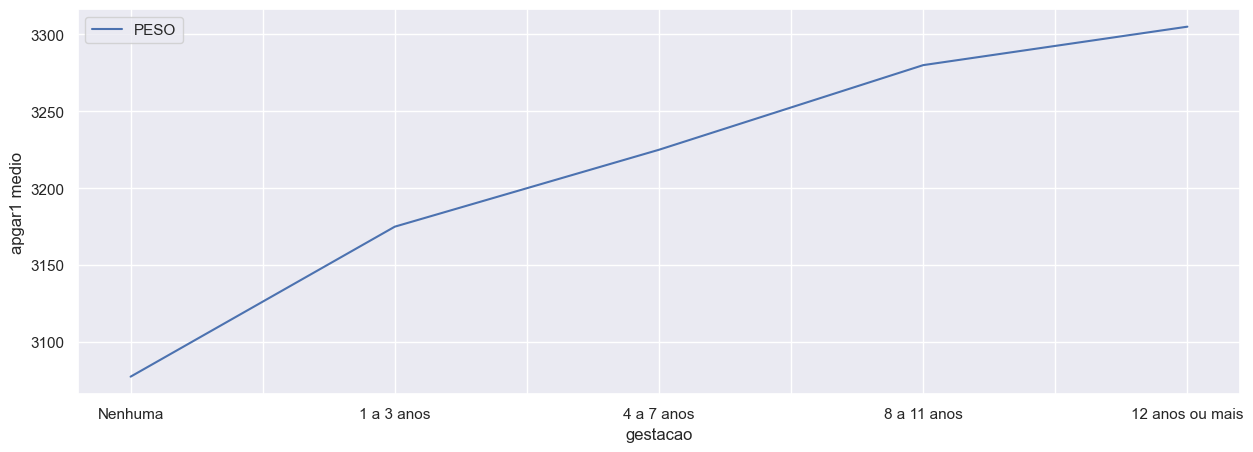

<Figure size 640x480 with 0 Axes>

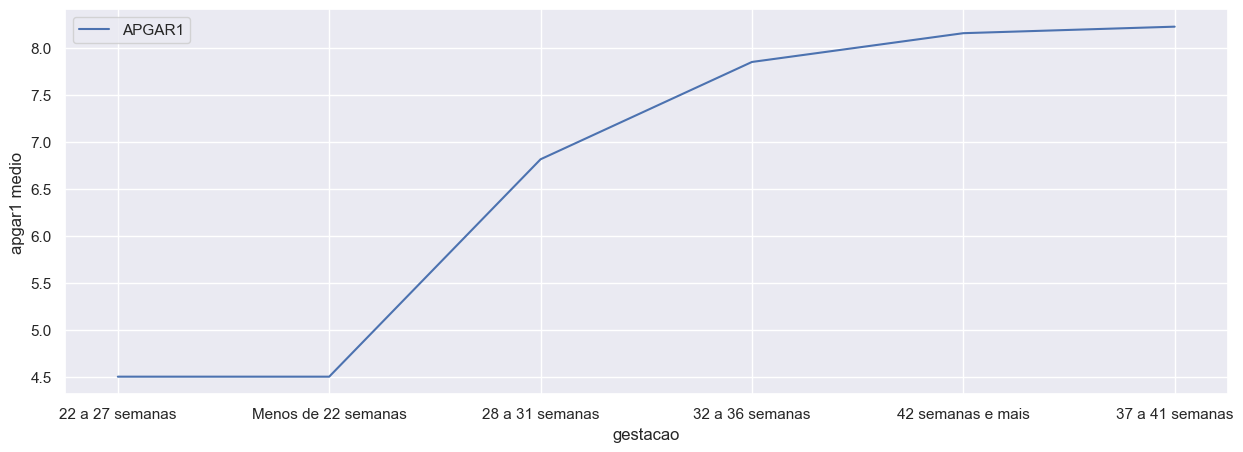

<Figure size 640x480 with 0 Axes>

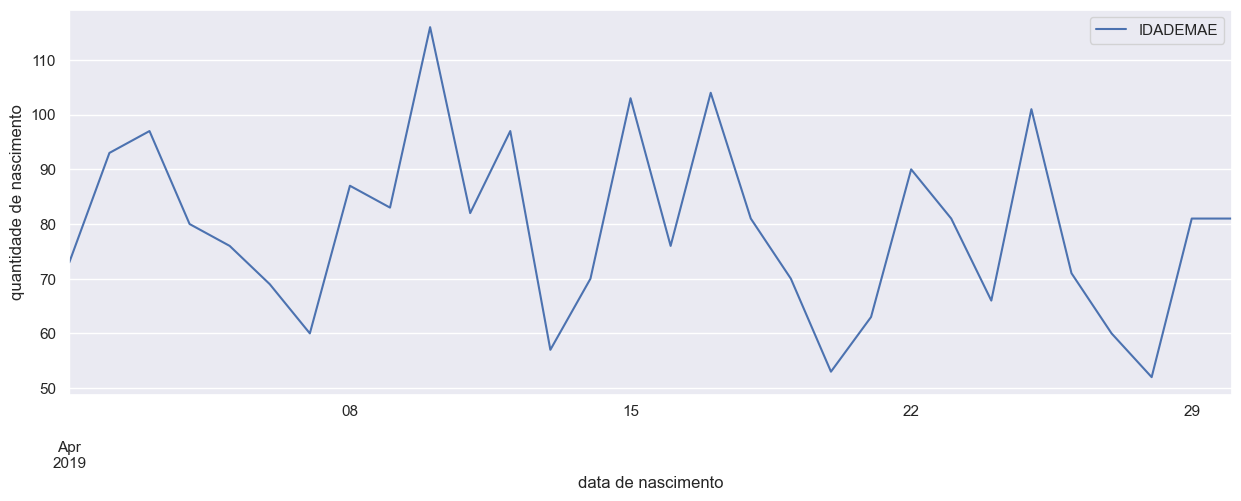

<Figure size 640x480 with 0 Axes>

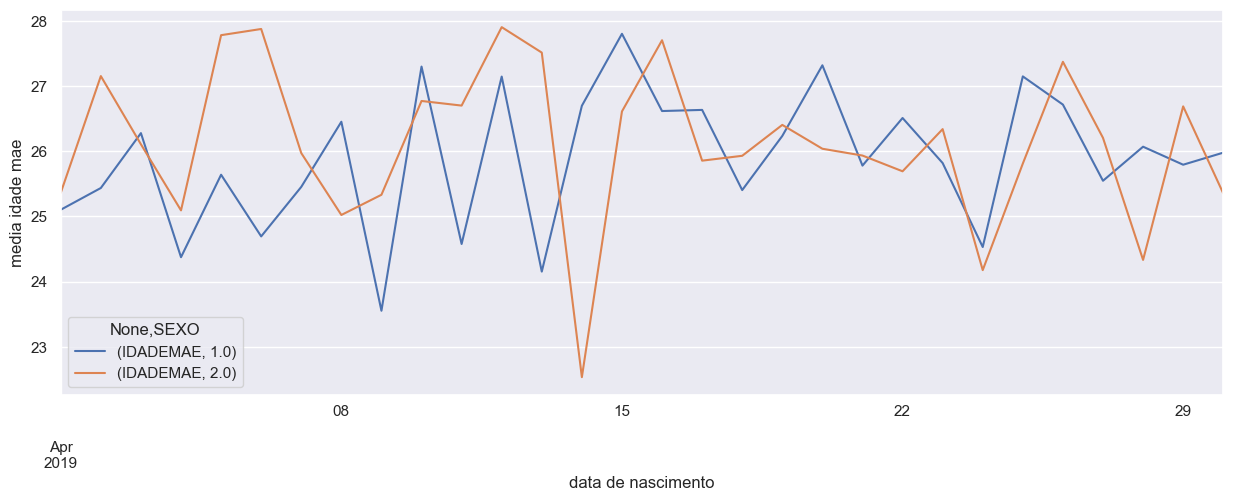

<Figure size 640x480 with 0 Axes>

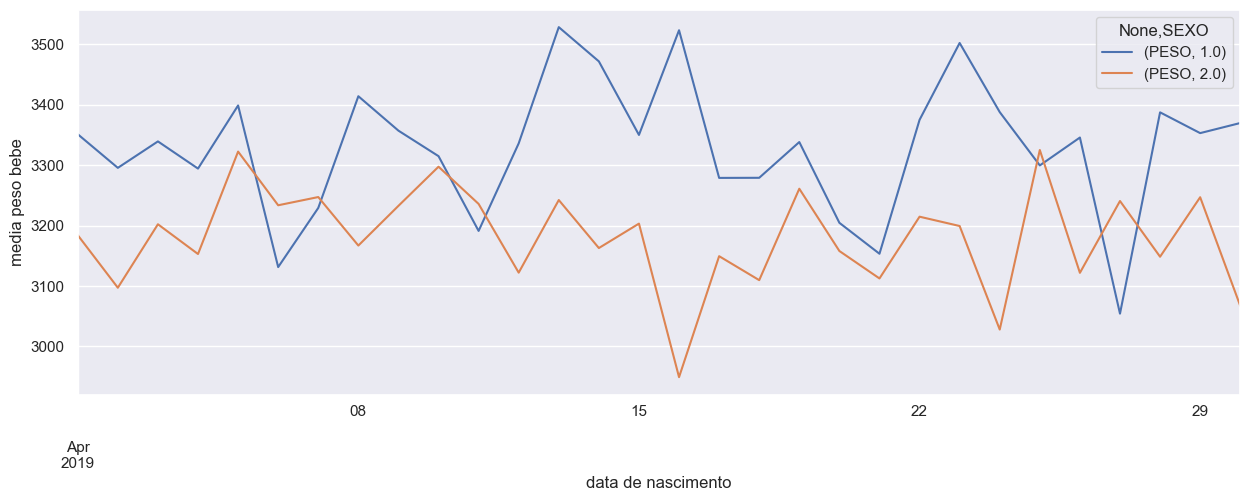

<Figure size 640x480 with 0 Axes>

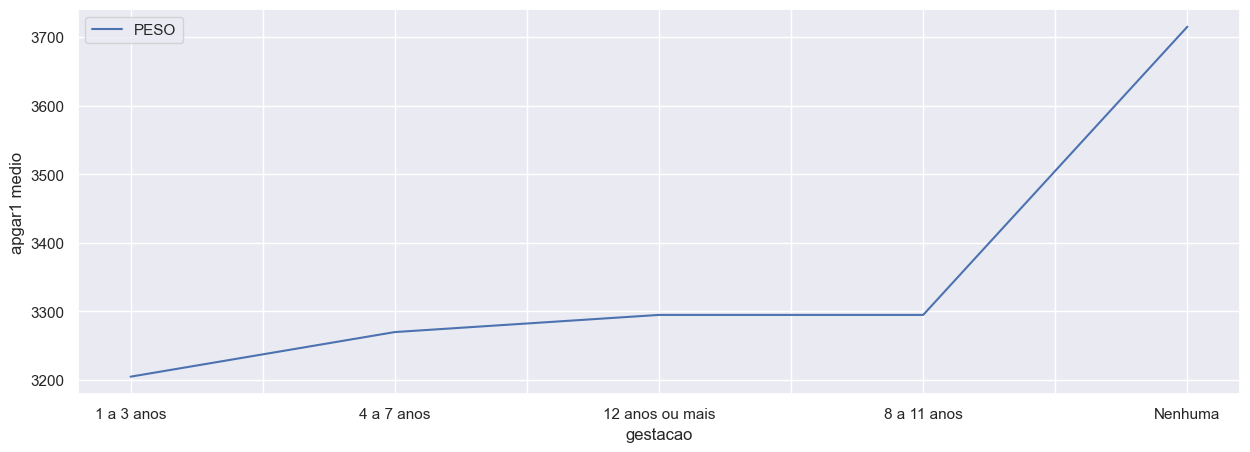

<Figure size 640x480 with 0 Axes>

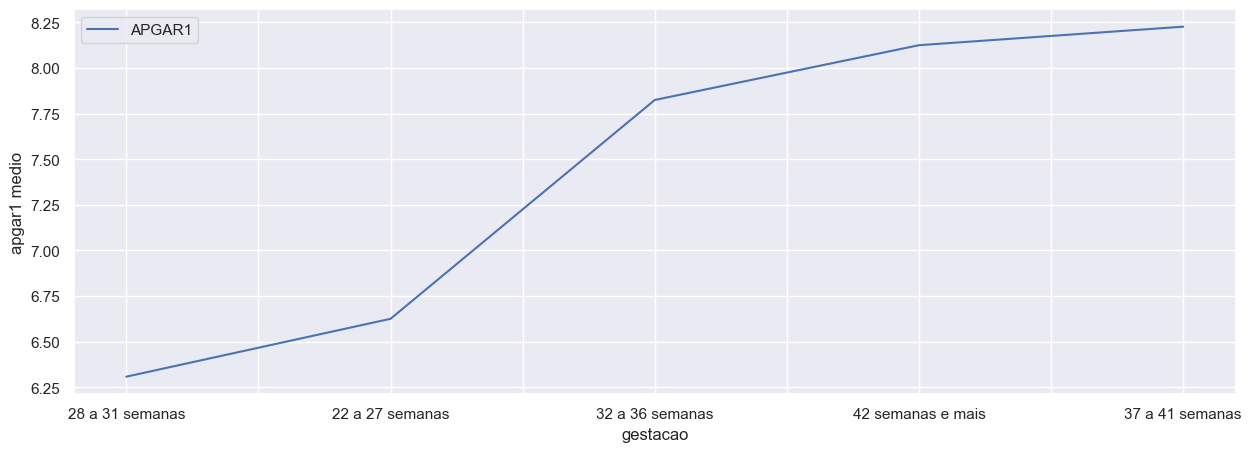

<Figure size 640x480 with 0 Axes>

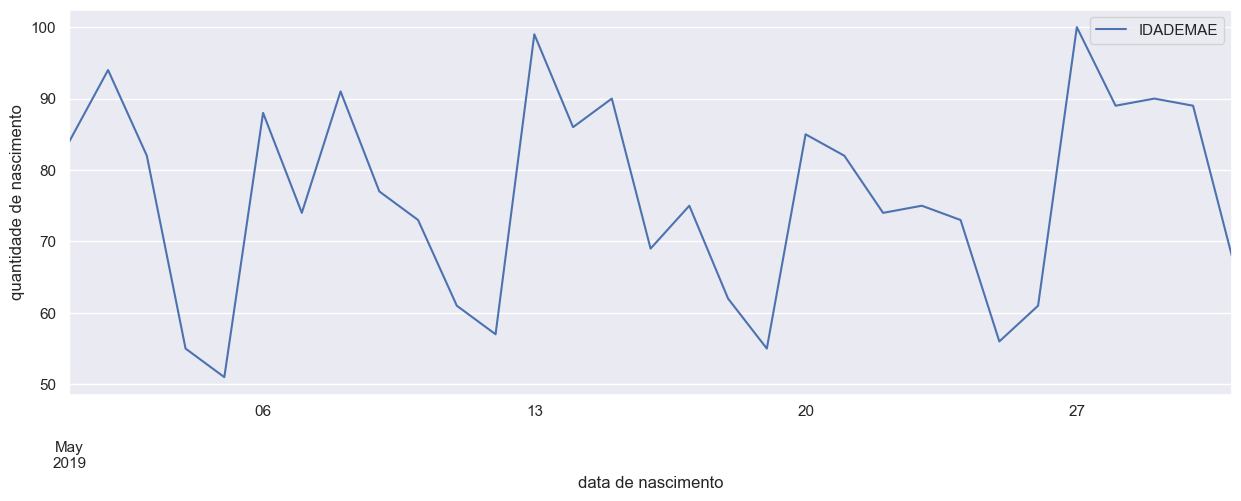

<Figure size 640x480 with 0 Axes>

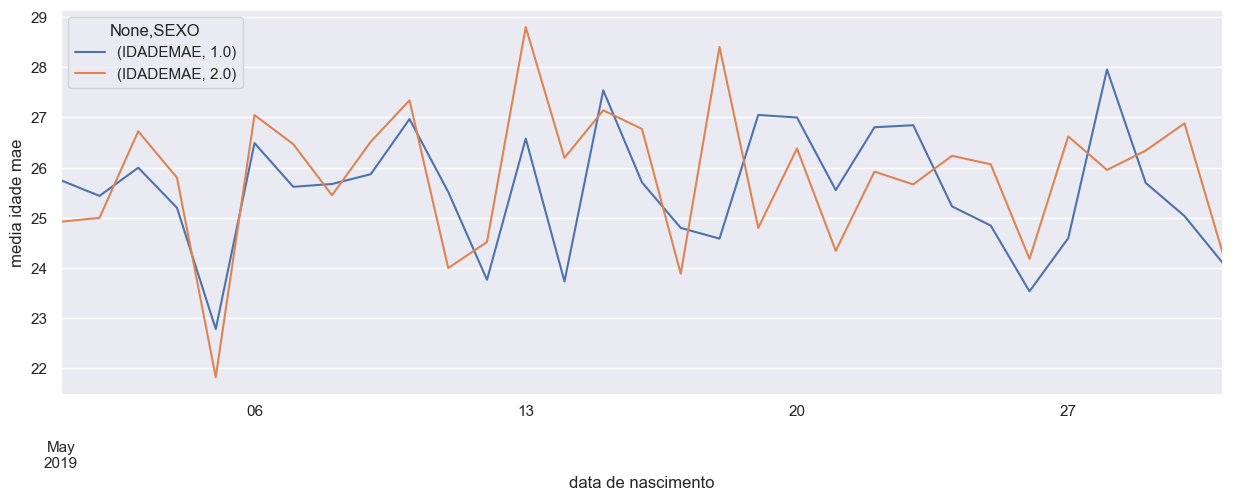

<Figure size 640x480 with 0 Axes>

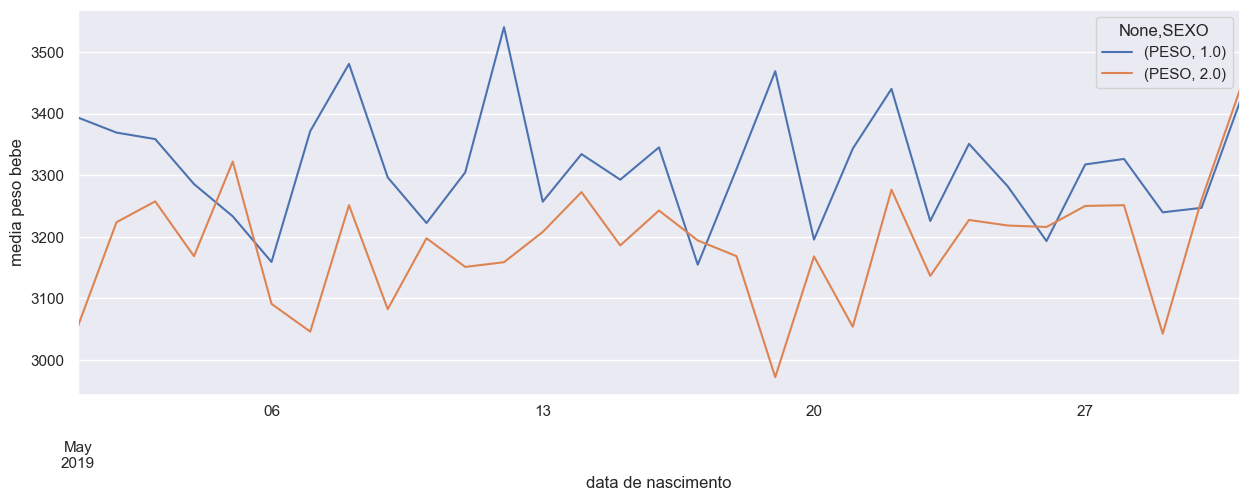

<Figure size 640x480 with 0 Axes>

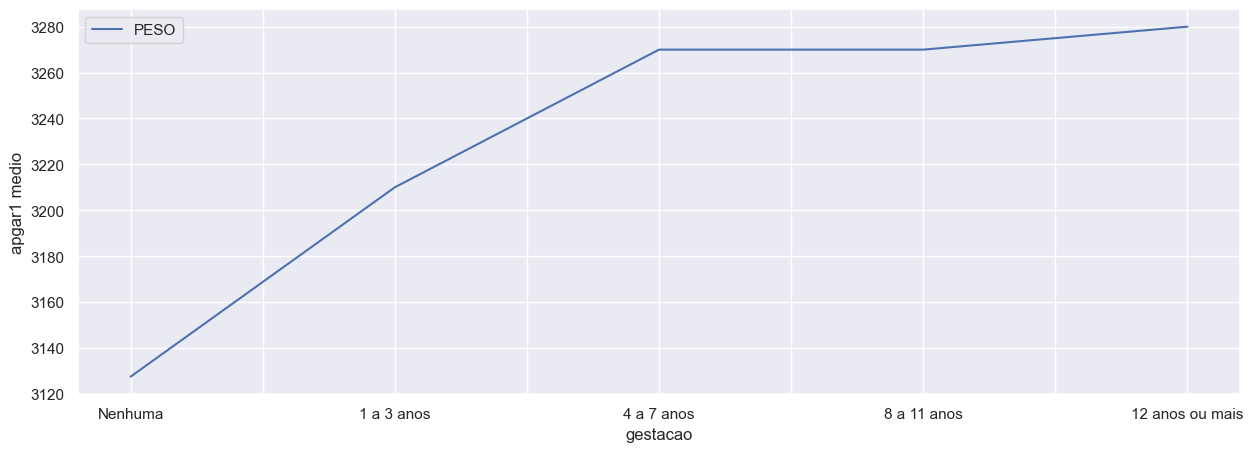

<Figure size 640x480 with 0 Axes>

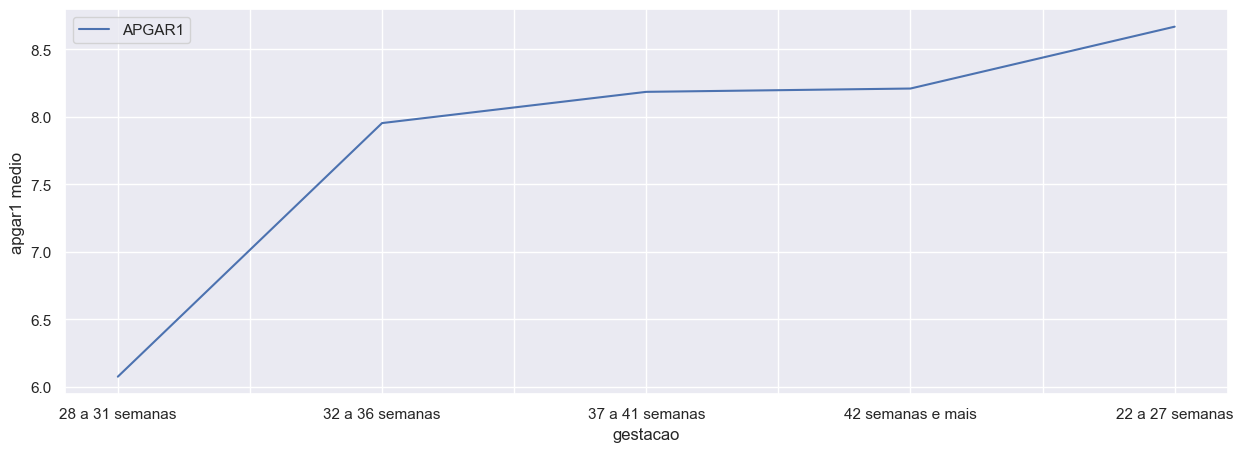

<Figure size 640x480 with 0 Axes>

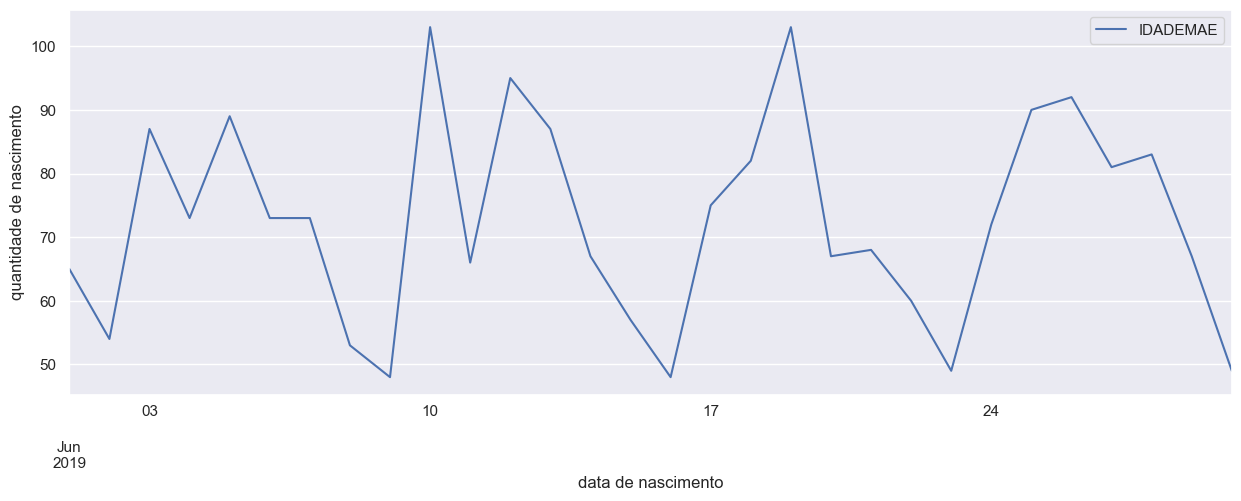

<Figure size 640x480 with 0 Axes>

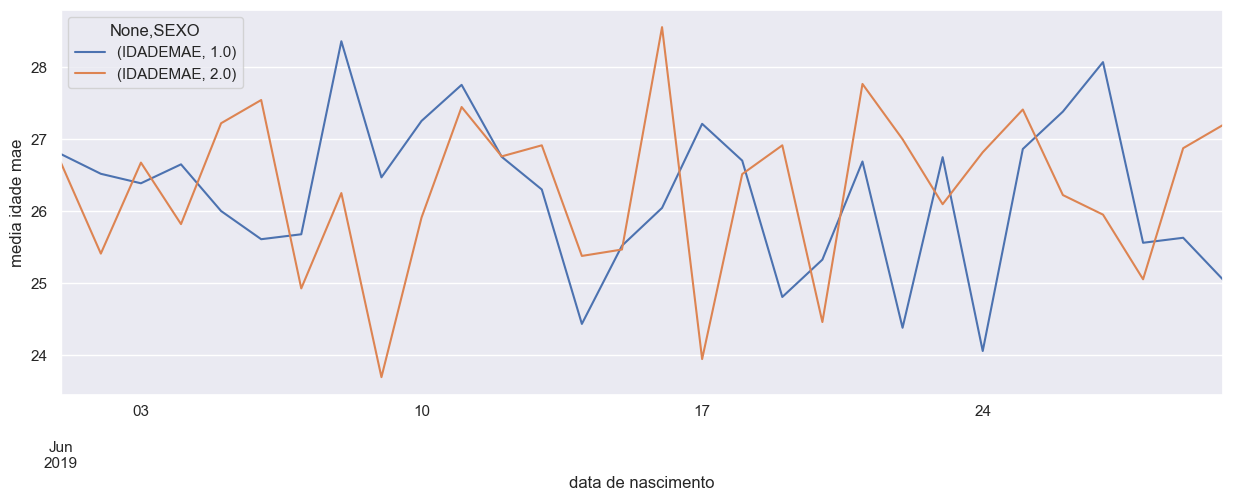

<Figure size 640x480 with 0 Axes>

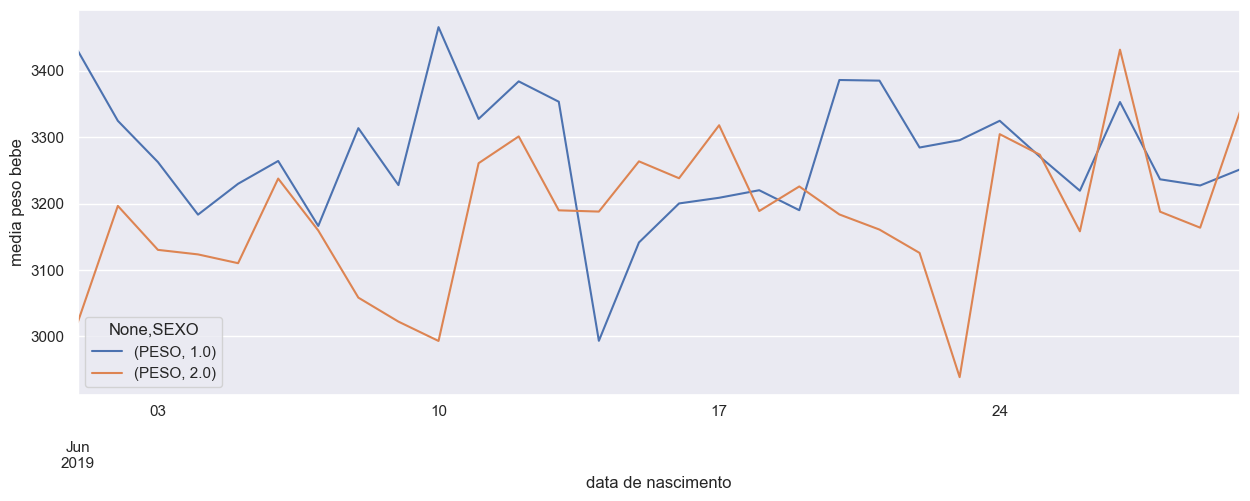

<Figure size 640x480 with 0 Axes>

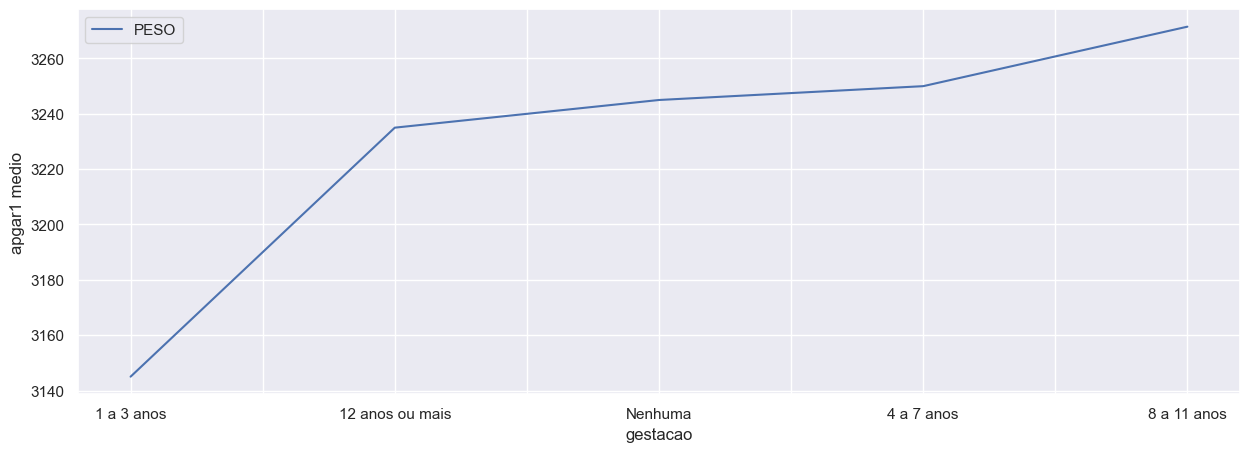

<Figure size 640x480 with 0 Axes>

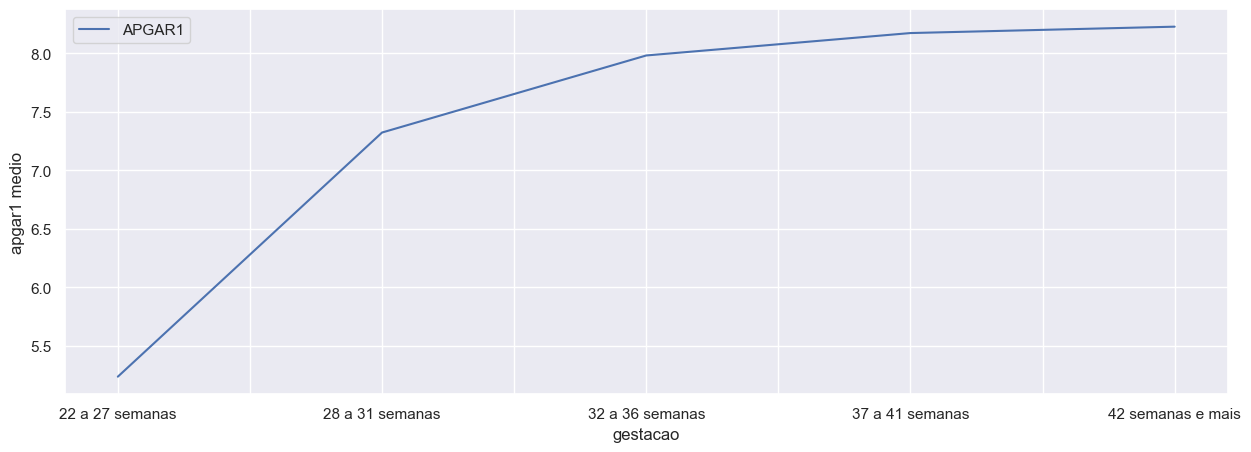

<Figure size 640x480 with 0 Axes>

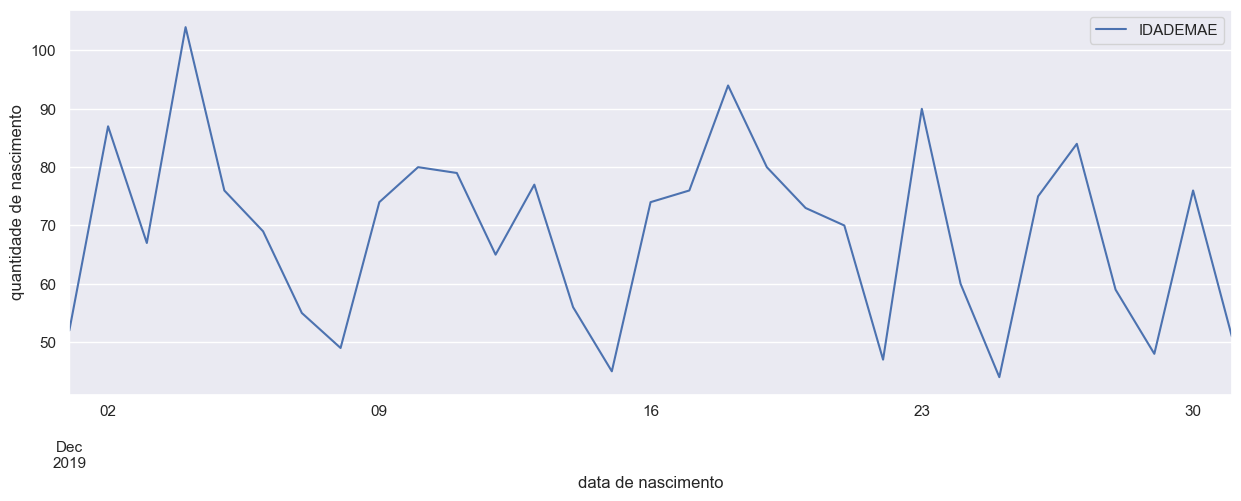

<Figure size 640x480 with 0 Axes>

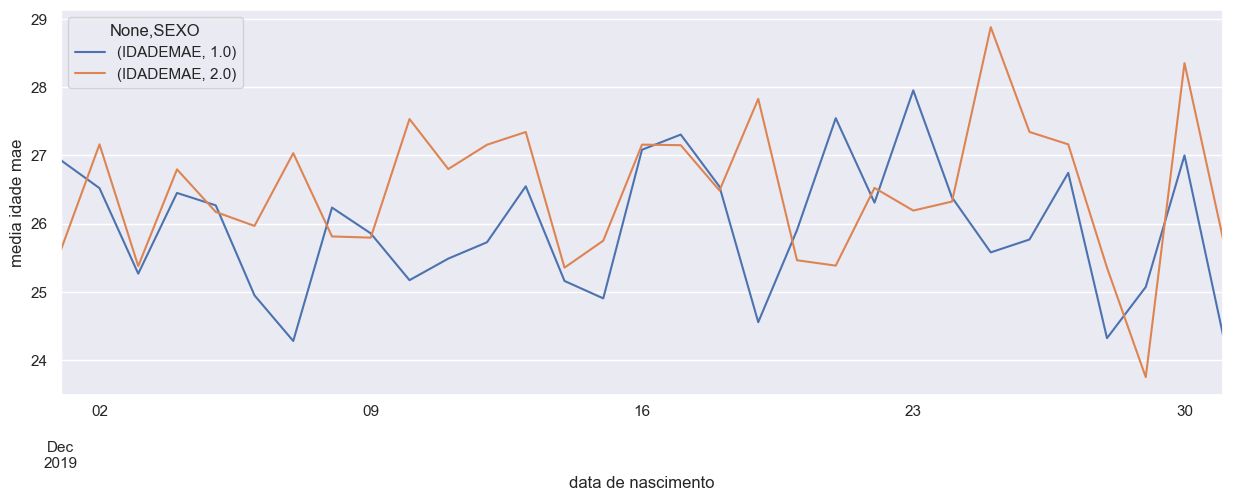

<Figure size 640x480 with 0 Axes>

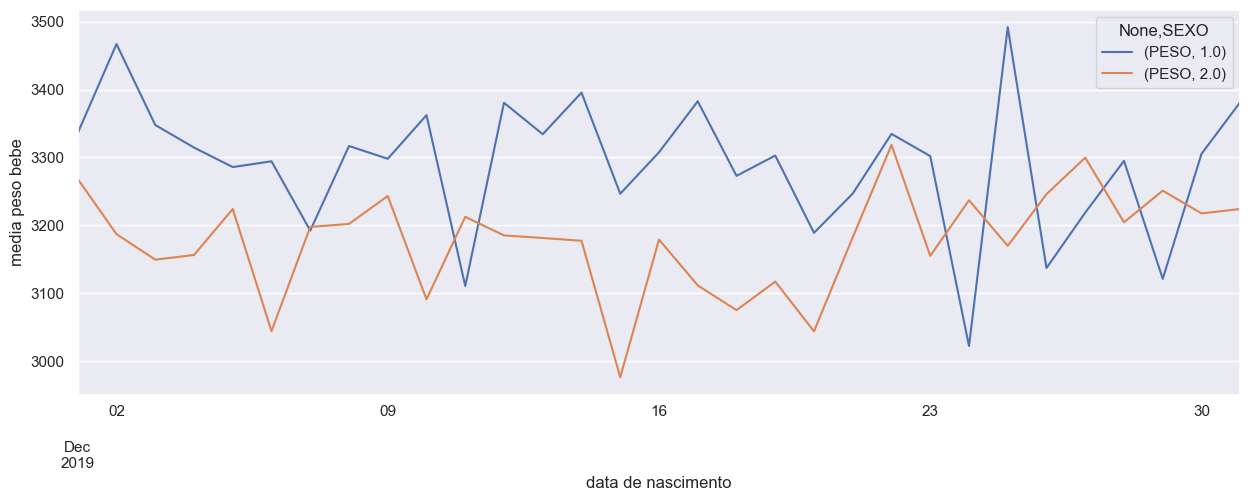

<Figure size 640x480 with 0 Axes>

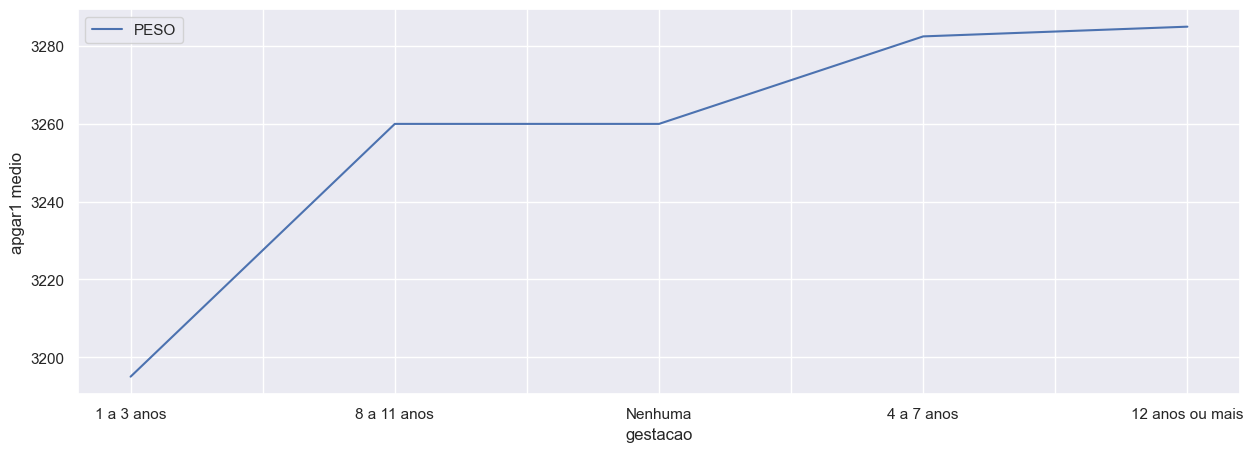

<Figure size 640x480 with 0 Axes>

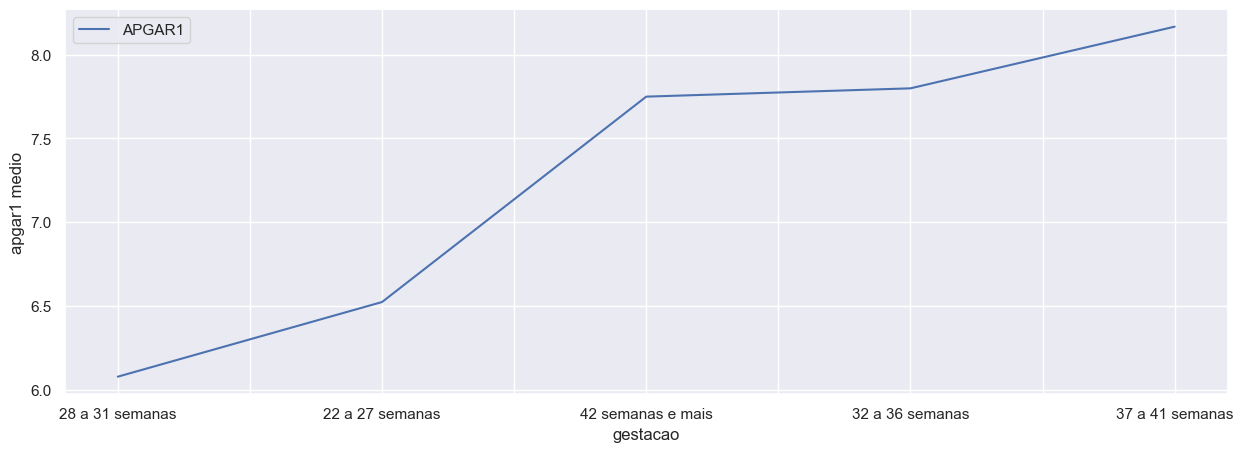

<Figure size 640x480 with 0 Axes>

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Configurar estilo dos gráficos
sns.set_theme()

# Carregar base de dados
sinasc = pd.read_csv('G:\\EBAC\\Base de Dados\\SINASC_RO_2019.csv')

# Preencher dados faltantes com a média
sinasc['IDADEMAE'].fillna(sinasc['IDADEMAE'].mean(), inplace=True)
sinasc['PESO'].fillna(sinasc['PESO'].mean(), inplace=True)
sinasc['APGAR1'].fillna(sinasc['APGAR1'].mean(), inplace=True)
sinasc['APGAR5'].fillna(sinasc['APGAR5'].mean(), inplace=True)

# Substituir valores de sexo por números
sinasc['SEXO'] = sinasc['SEXO'].map({'Masculino': 1, 'Feminino': 2})

# Converter variáveis para numéricos
sinasc['IDADEMAE'] = pd.to_numeric(sinasc['IDADEMAE'], errors='coerce')
sinasc['PESO'] = pd.to_numeric(sinasc['PESO'], errors='coerce')
sinasc['APGAR1'] = pd.to_numeric(sinasc['APGAR1'], errors='coerce')
sinasc['APGAR5'] = pd.to_numeric(sinasc['APGAR5'], errors='coerce')
sinasc['SEXO'] = pd.to_numeric(sinasc['SEXO'], errors='coerce')

# Função para gerar gráficos
def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    pivot_table = pd.pivot_table(df, values=value, index=index, aggfunc=func)
    
    if pivot_table.empty:
        print(f"Nenhum dado disponível para {value} com índice {index}")
        return None
    
    if opcao == 'nada':
        pivot_table.plot(figsize=[15, 5])
    elif opcao == 'sort':
        pivot_table.sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pivot_table.unstack().plot(figsize=[15, 5])
    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

# Gerar gráficos para cada mês
meses = ['03', '04', '05', '06', '12']
for mes in meses:
    # Filtrar dados para o mês atual usando filtro de data
    sinasc['DTNASC'] = pd.to_datetime(sinasc['DTNASC'], errors='coerce')
    sinasc_mes = sinasc[sinasc['DTNASC'].dt.month == int(mes)]
    
    if sinasc_mes.empty:
        print(f"Nenhum dado disponível para o mês {mes}")
        continue

    # Gerar gráficos
    output_dir = f'./output/figs/{mes}'
    os.makedirs(output_dir, exist_ok=True)
    
    plota_pivot_table(sinasc_mes, 'IDADEMAE', 'DTNASC', 'count', 'quantidade de nascimento', 'data de nascimento')
    plt.savefig(f'{output_dir}/quantidade_de_nascimento.png')
    
    plota_pivot_table(sinasc_mes, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae', 'data de nascimento', 'unstack')
    plt.savefig(f'{output_dir}/media_idade_mae_por_sexo.png')
    
    plota_pivot_table(sinasc_mes, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe', 'data de nascimento', 'unstack')
    plt.savefig(f'{output_dir}/media_peso_bebe_por_sexo.png')
    
    plota_pivot_table(sinasc_mes, 'PESO', 'ESCMAE', 'median', 'apgar1 medio', 'gestacao', 'sort')
    plt.savefig(f'{output_dir}/media_apgar1_por_escolaridade_mae.png')
    
    plota_pivot_table(sinasc_mes, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio', 'gestacao', 'sort')
    plt.savefig(f'{output_dir}/media_apgar1_por_gestacao.png')

* Como que você poderia fazer para deixar isso mais automatizado? Descreva na última célila do jupyter notebook o que ajudaria na hora de gerar novos gráficos pros meses/anos seguintes.

### * Para automatizar a base, podemos iterar automaticamenmte por múltiplos meses e anos, usando um loop para processar vátios meses. Pode ser feito através de lista de meses, ou anos, para processar os dados gerados.

### * Parametrizar o caminho do arquivo e os nomes, facilitando a mudança de diretórios e a organização dos resultados sem a necessidade de editar o código a cada altareção.